# Datos

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Lista de empresas solo EEUU
#tickers = [
   # "AMZN","KO","UBER","PEP","TSLA","AAPL","MSFT","NVDA","NFLX",
# "DIS","NKE","F","WMT","PFE","META","GOOG","MA","V"
# ]

# Descargar datos
# data = yf.download(
  #  tickers,
   # start="2020-01-01",
    # end="2025-10-30",
    # group_by="ticker"
# )

# Convertir a formato largo (tidy)
# frames = []
# for ticker in tickers:
  #  df_temp = data[ticker].copy()
  #  df_temp["Ticker"] = ticker
  #  frames.append(df_temp)

# df = pd.concat(frames)
# df.reset_index(inplace=True)

# Guardar CSV
# df.to_csv("Datos.csv", index=False)

#print("Archivo creado: Datos.csv")
# df.head()


In [39]:
import pandas as pd
import matplotlib.dates as mdates

In [53]:
df = pd.read_csv("Datos.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")

df.head() #Ya está ordenado por fecha
df.tail()
len(df)
df.shape[0]



26370

In [41]:
colores_empresas = {
    "AMZN": "#2ca02c",  
    "KO":   "#FF0000",   
    "UBER": "#000000",   
    "PEP":  "#005CB8",  
    "TSLA": "#CC0000",   
    "AAPL": "#1f77b4",   
    "MSFT": "#BE8C00",   
    "NVDA": "#76B900",   
    "NFLX": "#E50914",   
    "DIS":  "#113CCF",  
    "NKE":  "#111111",   
    "F":    "#003399",   
    "WMT": "#0071CE",   
    "PFE": "#0082D1",   
    "META": "#4267B2",  
    "GOOG": "#4285F4",  
    "MA":   "#FF5F00",  
    "V":    "#0057B8"  
}

In [42]:
def graficar_empresa(nombre_empresa):

    empresa_df = df[df["Ticker"] == nombre_empresa] # Filtrar los datos de la empresa elegida

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Crear el gráfico
    plt.figure(figsize=(10,5))
    plt.plot(empresa_df["Date"], empresa_df["Close"], label=nombre_empresa, linewidth=2)

    # Detalles estéticos
    plt.title(f"Precio histórico de {nombre_empresa}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [43]:
def graficar_empresa(nombre_empresa):
    empresa_df = df[df["Ticker"] == nombre_empresa].copy()

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Convertir fechas
    empresa_df["Date"] = pd.to_datetime(empresa_df["Date"])

    # Color elegido
    color = colores_empresas.get(nombre_empresa, "#000000")  # Negro si no está en el diccionario

    # ---- Gráfico ----
    fig, ax = plt.subplots(figsize=(12,6))

    # Línea del precio de cierre
    ax.plot(empresa_df["Date"], empresa_df["Close"], linewidth=2, label=nombre_empresa, color=color)

    # Eje X: solo años
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Estética
    ax.set_title(f"Precio Histórico - {nombre_empresa}", fontsize=14)
    ax.set_xlabel("Año")
    ax.set_ylabel("Precio")
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    plt.show()

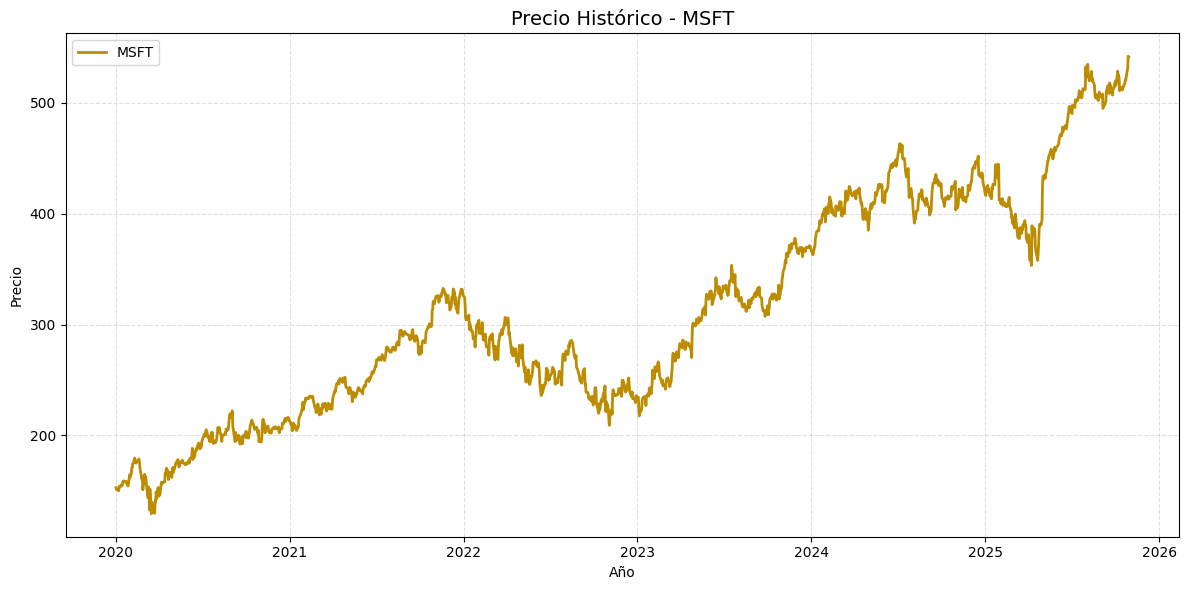

In [44]:
graficar_empresa("MSFT")

# Grafico comparativo

In [45]:
import matplotlib.pyplot as plt

def graficar_comparativo(lista_empresas, df):

    plt.figure(figsize=(12,6))
    empresas_validas = False
    
    for empresa in lista_empresas:
        empresa_df = df[df["Ticker"] == empresa]

        if empresa_df.empty:
            print(f"⚠️ No se encontraron datos para la empresa: {empresa}")
            continue
        
        empresas_validas = True
        
        # Obtener color asignado o uno por defecto si no está en el diccionario
        color = colores_empresas.get(empresa, None)

        plt.plot(empresa_df["Date"], empresa_df["Close"], 
                 label=empresa, linewidth=2, color=color)

    if not empresas_validas:
        print("No se pudo graficar porque ninguna empresa tenía datos.")
        return

    plt.title("Comparación del Precio de Cierre entre Empresas")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Empresas")
    plt.tight_layout()
    plt.show()


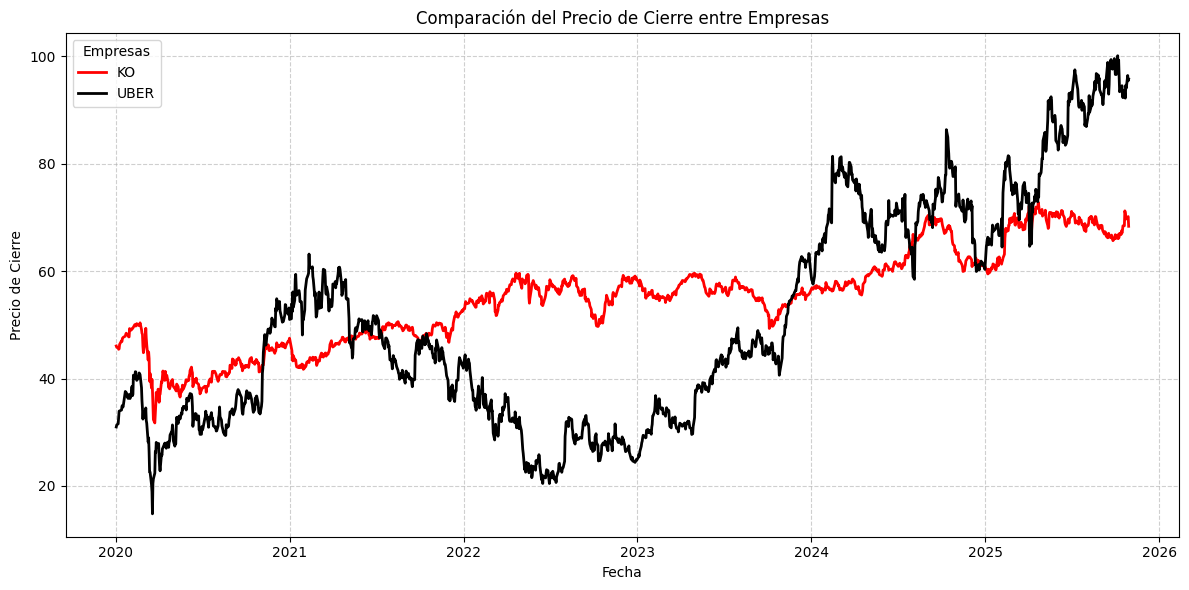

In [46]:
empresas = ["KO","UBER"]
graficar_comparativo(empresas, df)

# Tabla de Precios diarios 

In [47]:
import pandas as pd
df = pd.read_csv("Datos.csv") 
df["Date"] = pd.to_datetime(df["Date"])

In [48]:
empresa = "AAPL" #se puede cambiar la empresa
#"AMZN","KO","UBER","PEP","TSLA","AAPL","MSFT","NVDA","NFLX","DIS","NKE","F","WMT","PFE","META","GOOG","MA","V" 
fecha_inicio = "2021-01-01"
fecha_fin = "2023-01-01"
#rango de fechas (2021-01-01 a 2023-01-01)

In [49]:
tabla_precios_diarios  = df[
    (df["Ticker"] == empresa) & 
    (df["Date"] >= fecha_inicio) & 
    (df["Date"] <= fecha_fin)
]
tabla_precios_diarios = tabla_precios_diarios.round(2)

tabla_precios_diarios.tail()
tabla_precios_diarios.head()

tabla_precios_diarios

,Date,Open,High,Low,Close,Volume,Ticker
7578,2021-01-04,130.10,130.19,123.51,126.10,143301900,AAPL
7579,2021-01-05,125.59,128.37,125.14,127.66,97664900,AAPL
7580,2021-01-06,124.45,127.69,123.14,123.36,155088000,AAPL
7581,2021-01-07,125.07,128.26,124.59,127.57,109578200,AAPL
7582,2021-01-08,129.04,129.23,126.90,128.67,105158200,AAPL
...,...,...,...,...,...,...,...
8076,2022-12-23,129.10,130.58,127.84,130.03,63814900,AAPL
8077,2022-12-27,129.55,129.58,126.93,128.22,69007800,AAPL
8078,2022-12-28,127.87,129.21,124.12,124.29,85438400,AAPL
8079,2022-12-29,126.21,128.67,125.95,127.81,75703700,AAPL
